### 점진적인 학습
#### 확률적 경사 하강법
- 확률적이란 말은 '무작위하게' 혹은 '랜덤하게' 라는 뜻
- 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것
- 에포크: 훈련 세트를 한 번 모두 사용하는 과정
- 미니배치 경사 하강법: 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치 경사 하강법: 전체 샘플을 사용하는 방법(컴퓨터 자원을 많이 사용함)

#### 손실함수
- 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준

### 로지스틱 손실 함수
- 로지스틱 손실 함수: 이진 분류에서 사용하는 손실 함수
- 크로스엔트로피 손실 함수: 다중 분류에서 사용하는 손실 함수
- 평균 제곱 오차: 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값. 작을 수록 좋은 모델

### SGDClassifier

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input = fish.iloc[:,1:6].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# 확률적 경사 하강법 클래스 = SGDClassifier
from sklearn.linear_model import SGDClassifier

In [7]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # loss=log, 로지스틱 손실 함수, max_iter 수행할 에포크 횟수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target) # 1 에포크씩 이어서 훈련 가능함.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 에포크와 과대/과소적합
- 조기 종료: 과대적합이 시작하기 전에 훈련을 멈추는 것

In [9]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [10]:
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [14]:
for _ in range(300): # 적절한 에포크 횟수 찾기 위한 반복문
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

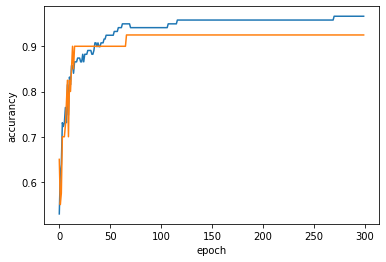

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.show() # 그래프 상 100번째 에포크가 적절하게 보임

In [17]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복되도록 함
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [18]:
# 힌지 로스(서포트 벡터 머신 예시, 에포크 횟수를 다시 찾아봐야 하는게 맞음)
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
